In [1]:
# load packages
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error

import os
import torch
import torch.nn.functional as F
from torch.utils import data
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
import warnings
import pickle
warnings.filterwarnings('ignore')
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [27]:
from model_regression_best_parameter import model_regression_best_parameters
from model_regression_optuna import model_optuna
from test_regression_0 import test_regression_0
from data_processor import data_processor

# data_processing（等讨论好具体怎么做，以什么为输入数据再写）

In [107]:
model_type = 'MLP'
future_time = 0.25
T = 100
rolling_ratio = 0.5
train_ratio = 0.75
data_type = 'lob'
batch_size = 256
normalization_type = 'minmax'
epochs = 100

In [8]:
data_input_processor = data_processor(model_type = model_type, future_time = future_time,T = T,rolling_ratio = rolling_ratio, \
                                      train_ratio = train_ratio,data_type = data_type,batch_size = batch_size,normalization_type = normalization_type)
dataset_train,dataset_val,dataset_test,train_loader,val_loader,test_loader = data_input_processor.getting_data_input()

In [5]:
##比如我们的输入是最近100行的40个feature
##对于LSTM、stacked_LSTM、LSTM-MLP，loader里面输入是[样本量,100,40]形式
##对于MLP，loader里面的输入是[样本量，1，4000]形式
##对于CNN-LSTM，loader里面的输入是[样本量，1，100，40]形式

# model using optuna to get best parameters

In [1]:
model_o = model_optuna(model_type = model_type, epochs = epochs, feature_name = data_type, future_time = future_time,data_train_loader = train_loader,data_val_loader = val_loader)
para_best = model_o.getting_best_para()

# model_regression using best parameter

In [111]:
##params1改为各个神经网络调好的参数
if model_type == 'CNN-LSTM':
    params1 = {
        'conv_filter_num':32,
        'inception_num':64,
        'LSTM_num':64,
        'leaky_relu_alpha':0.01,
          }
elif model_type == 'MLP':
    params1 = {
            'inputsize':4000,
            'layer1':400,
            'layer2':50,
            'layer3':10,
                }
elif model_type == 'LSTM':
    params1 = {
            'num_layers':2,
            'input_size':40,
            'hidden_size':100,              
                }
elif model_type == 'LSTM-MLP':
    params1 = {
            'num_layers':2,
            'input_size':40,
            'hidden_size':80,  
            'fc_size':20,
                } 
elif model_type == 'stacked_LSTM':
    params1 = {
            'num_layers_s': 1,
            'input_size_s': 40,
            'hidden_size_s_1': 80,
            'hidden_size_s_2': 150,
            'hidden_size_s_3': 200,
                }
params2 = {
    'lr':0.00005,
       }
model1 = model_regression_best_parameters(model_type = model_type, epochs = epochs, feature_name = data_type, future_time = future_time,data_train_loader = train_loader,data_val_loader = val_loader,para1 = params1,para2 = params2)
x,xx = model1.train_model()

cuda:0


100%|██████████| 1132/1132 [00:08<00:00, 128.42it/s]


-0.9326581 0.18801211


100%|██████████| 378/378 [00:02<00:00, 158.55it/s]


-0.13195544 0.06351448
Epoch 1/100, Train Loss: 3107.2432,               Validation Loss: 47.8776, Duration: 0:00:11.221661, Best Val Epoch: 0


100%|██████████| 1132/1132 [00:10<00:00, 108.75it/s]


-0.10934079 0.088009775


100%|██████████| 378/378 [00:02<00:00, 127.92it/s]


-0.10332887 0.04936237
Epoch 2/100, Train Loss: 43.5216,               Validation Loss: 11.2233, Duration: 0:00:13.386452, Best Val Epoch: 1


100%|██████████| 1132/1132 [00:08<00:00, 128.98it/s]


-0.21447635 0.15593381


100%|██████████| 378/378 [00:02<00:00, 176.09it/s]


-0.102974296 0.040802762
Epoch 3/100, Train Loss: 56.1844,               Validation Loss: 18.9262, Duration: 0:00:10.932130, Best Val Epoch: 1


100%|██████████| 1132/1132 [00:09<00:00, 123.03it/s]


-0.17819849 0.15107486


100%|██████████| 378/378 [00:02<00:00, 177.43it/s]


-0.098274425 0.035758995
Epoch 4/100, Train Loss: 31.9137,               Validation Loss: 5.2732, Duration: 0:00:11.354952, Best Val Epoch: 3


100%|██████████| 1132/1132 [00:09<00:00, 114.34it/s]


-0.10132153 0.10104087


100%|██████████| 378/378 [00:02<00:00, 132.92it/s]


-0.07750845 0.030699417
Epoch 5/100, Train Loss: 16.5915,               Validation Loss: 8.1995, Duration: 0:00:12.753946, Best Val Epoch: 3


100%|██████████| 1132/1132 [00:08<00:00, 130.78it/s]


-0.1871639 0.12543604


100%|██████████| 378/378 [00:02<00:00, 177.23it/s]


-0.07526168 0.028748259
Epoch 6/100, Train Loss: 29.1985,               Validation Loss: 3.9251, Duration: 0:00:10.812087, Best Val Epoch: 5


100%|██████████| 1132/1132 [00:09<00:00, 117.15it/s]


-0.06371187 0.06362653


100%|██████████| 378/378 [00:02<00:00, 181.48it/s]


-0.053809002 0.025089867
Epoch 7/100, Train Loss: 6.3609,               Validation Loss: 4.5247, Duration: 0:00:11.754330, Best Val Epoch: 5


100%|██████████| 1132/1132 [00:09<00:00, 117.33it/s]


-0.13350965 0.18568851


100%|██████████| 378/378 [00:02<00:00, 134.38it/s]


-0.046385348 0.02503857
Epoch 8/100, Train Loss: 22.1025,               Validation Loss: 3.1453, Duration: 0:00:12.483661, Best Val Epoch: 7


100%|██████████| 1132/1132 [00:09<00:00, 125.19it/s]


-0.08064583 0.08354564


100%|██████████| 378/378 [00:02<00:00, 180.56it/s]


-0.04972303 0.021256655
Epoch 9/100, Train Loss: 7.6963,               Validation Loss: 3.1095, Duration: 0:00:11.158759, Best Val Epoch: 8


100%|██████████| 1132/1132 [00:10<00:00, 109.85it/s]


-0.0799308 0.08117907


100%|██████████| 378/378 [00:03<00:00, 126.00it/s]


-0.04569252 0.018974498
Epoch 10/100, Train Loss: 9.9951,               Validation Loss: 1.8872, Duration: 0:00:13.327906, Best Val Epoch: 9


100%|██████████| 1132/1132 [00:09<00:00, 125.60it/s]


-0.103275105 0.13390096


100%|██████████| 378/378 [00:02<00:00, 181.60it/s]


-0.041748792 0.016793847
Epoch 11/100, Train Loss: 9.1890,               Validation Loss: 5.0128, Duration: 0:00:11.102571, Best Val Epoch: 9


100%|██████████| 1132/1132 [00:09<00:00, 119.87it/s]


-0.21022743 0.20663299


100%|██████████| 378/378 [00:02<00:00, 178.88it/s]


-0.028899625 0.018677667
Epoch 12/100, Train Loss: 18.6435,               Validation Loss: 1.9585, Duration: 0:00:11.565583, Best Val Epoch: 9


100%|██████████| 1132/1132 [00:10<00:00, 112.74it/s]


-0.01993896 0.021332987


100%|██████████| 378/378 [00:02<00:00, 128.43it/s]


-0.03754747 0.0136707425
Epoch 13/100, Train Loss: 1.9535,               Validation Loss: 2.9731, Duration: 0:00:12.992968, Best Val Epoch: 9


100%|██████████| 1132/1132 [00:09<00:00, 124.72it/s]


-0.08969705 0.06306723


100%|██████████| 378/378 [00:02<00:00, 182.97it/s]


-0.029704422 0.011836767
Epoch 14/100, Train Loss: 7.8122,               Validation Loss: 1.5875, Duration: 0:00:11.165243, Best Val Epoch: 13


100%|██████████| 1132/1132 [00:09<00:00, 121.86it/s]


-0.055517092 0.05549352


100%|██████████| 378/378 [00:02<00:00, 177.23it/s]


-0.023295209 0.011188254
Epoch 15/100, Train Loss: 3.6941,               Validation Loss: 3.3200, Duration: 0:00:11.430534, Best Val Epoch: 13


100%|██████████| 1132/1132 [00:10<00:00, 112.96it/s]


-0.08511621 0.07888742


100%|██████████| 378/378 [00:02<00:00, 144.45it/s]


-0.016498446 0.009984538
Epoch 16/100, Train Loss: 6.2063,               Validation Loss: 1.2020, Duration: 0:00:12.660151, Best Val Epoch: 15


100%|██████████| 1132/1132 [00:08<00:00, 127.29it/s]


-0.045718104 0.09001176


100%|██████████| 378/378 [00:02<00:00, 143.95it/s]


-0.017111138 0.011131138
Epoch 17/100, Train Loss: 2.9660,               Validation Loss: 2.6895, Duration: 0:00:11.528117, Best Val Epoch: 15


100%|██████████| 1132/1132 [00:08<00:00, 131.53it/s]


-0.121645406 0.082019635


100%|██████████| 378/378 [00:02<00:00, 173.09it/s]


-0.019838512 0.011863202
Epoch 18/100, Train Loss: 6.1149,               Validation Loss: 0.9530, Duration: 0:00:10.812310, Best Val Epoch: 17


100%|██████████| 1132/1132 [00:08<00:00, 129.57it/s]


-0.027778685 0.02408649


100%|██████████| 378/378 [00:02<00:00, 174.68it/s]


-0.018612444 0.010905996
Epoch 19/100, Train Loss: 1.7724,               Validation Loss: 1.0352, Duration: 0:00:10.910112, Best Val Epoch: 17


100%|██████████| 1132/1132 [00:10<00:00, 111.25it/s]


-0.049890593 0.045157224


100%|██████████| 378/378 [00:02<00:00, 146.99it/s]


-0.018700868 0.010126159
Epoch 20/100, Train Loss: 2.7745,               Validation Loss: 1.7376, Duration: 0:00:12.758029, Best Val Epoch: 17


100%|██████████| 1132/1132 [00:09<00:00, 122.21it/s]


-0.03568928 0.028018221


100%|██████████| 378/378 [00:02<00:00, 168.05it/s]


-0.015267611 0.009282291
Epoch 21/100, Train Loss: 2.6802,               Validation Loss: 0.9851, Duration: 0:00:11.521181, Best Val Epoch: 17


100%|██████████| 1132/1132 [00:08<00:00, 131.53it/s]


-0.029899552 0.023578972


100%|██████████| 378/378 [00:02<00:00, 182.41it/s]


-0.011529133 0.00876902
Epoch 22/100, Train Loss: 1.6676,               Validation Loss: 0.9002, Duration: 0:00:10.704671, Best Val Epoch: 21


100%|██████████| 1132/1132 [00:09<00:00, 114.29it/s]


-0.04098174 0.02783449


100%|██████████| 378/378 [00:02<00:00, 170.22it/s]


-0.0112133175 0.009650037
Epoch 23/100, Train Loss: 1.8030,               Validation Loss: 2.1523, Duration: 0:00:12.133507, Best Val Epoch: 21


100%|██████████| 1132/1132 [00:09<00:00, 117.28it/s]


-0.042807564 0.02420406


100%|██████████| 378/378 [00:03<00:00, 121.88it/s]


-0.010184765 0.009251952
Epoch 24/100, Train Loss: 1.8438,               Validation Loss: 2.1370, Duration: 0:00:12.763029, Best Val Epoch: 21


100%|██████████| 1132/1132 [00:08<00:00, 130.87it/s]


-0.015444234 0.018909812


100%|██████████| 378/378 [00:02<00:00, 171.30it/s]


-0.009130403 0.0060367733
Epoch 25/100, Train Loss: 1.3969,               Validation Loss: 0.9362, Duration: 0:00:10.865927, Best Val Epoch: 21


100%|██████████| 1132/1132 [00:09<00:00, 114.49it/s]


-0.034947976 0.02421084


100%|██████████| 378/378 [00:02<00:00, 131.02it/s]


-0.008801207 0.0057988465
Epoch 26/100, Train Loss: 1.6934,               Validation Loss: 1.8848, Duration: 0:00:12.783294, Best Val Epoch: 21


100%|██████████| 1132/1132 [00:09<00:00, 118.65it/s]


-0.017817542 0.018069103


100%|██████████| 378/378 [00:02<00:00, 186.46it/s]


-0.0097254515 0.0061219037
Epoch 27/100, Train Loss: 1.1042,               Validation Loss: 0.9203, Duration: 0:00:11.576625, Best Val Epoch: 21


100%|██████████| 1132/1132 [00:08<00:00, 131.93it/s]


-0.10221128 0.07091984


100%|██████████| 378/378 [00:02<00:00, 178.00it/s]


-0.009419456 0.005067885
Epoch 28/100, Train Loss: 3.7494,               Validation Loss: 1.3034, Duration: 0:00:10.712704, Best Val Epoch: 21


100%|██████████| 1132/1132 [00:09<00:00, 115.23it/s]


-0.012577638 0.015392199


100%|██████████| 378/378 [00:02<00:00, 180.53it/s]


-0.00480251 0.00438942
Epoch 29/100, Train Loss: 1.1615,               Validation Loss: 0.7620, Duration: 0:00:11.940729, Best Val Epoch: 28


100%|██████████| 1132/1132 [00:09<00:00, 118.94it/s]


-0.015980035 0.009218901


100%|██████████| 378/378 [00:03<00:00, 125.59it/s]


-0.0046468973 0.026053593
Epoch 30/100, Train Loss: 0.9966,               Validation Loss: 25.4683, Duration: 0:00:12.536696, Best Val Epoch: 28


100%|██████████| 1132/1132 [00:08<00:00, 134.36it/s]


-0.042037234 0.03847848


100%|██████████| 378/378 [00:02<00:00, 172.45it/s]


-0.0033503324 0.007151857
Epoch 31/100, Train Loss: 1.4922,               Validation Loss: 0.6821, Duration: 0:00:10.640335, Best Val Epoch: 30


100%|██████████| 1132/1132 [00:09<00:00, 119.33it/s]


-0.01156269 0.010190263


100%|██████████| 378/378 [00:02<00:00, 179.21it/s]


-0.004624173 0.006034583
Epoch 32/100, Train Loss: 0.8771,               Validation Loss: 1.0612, Duration: 0:00:11.604265, Best Val Epoch: 30


100%|██████████| 1132/1132 [00:09<00:00, 116.30it/s]


-0.03503695 0.032255143


100%|██████████| 378/378 [00:02<00:00, 128.03it/s]


-0.0026120394 0.0076809227
Epoch 33/100, Train Loss: 1.0232,               Validation Loss: 3.0509, Duration: 0:00:12.694871, Best Val Epoch: 30


100%|██████████| 1132/1132 [00:08<00:00, 133.34it/s]


-0.014055982 0.013503671


100%|██████████| 378/378 [00:02<00:00, 179.36it/s]


-0.004176125 0.0027648807
Epoch 34/100, Train Loss: 0.9593,               Validation Loss: 0.8879, Duration: 0:00:10.605944, Best Val Epoch: 30


100%|██████████| 1132/1132 [00:10<00:00, 108.25it/s]


-0.007869333 0.010844052


100%|██████████| 378/378 [00:02<00:00, 132.54it/s]


-0.0034342855 0.0040602535
Epoch 35/100, Train Loss: 0.7873,               Validation Loss: 0.9180, Duration: 0:00:13.318333, Best Val Epoch: 30


100%|██████████| 1132/1132 [00:09<00:00, 121.31it/s]


-0.018780515 0.01647257


100%|██████████| 378/378 [00:02<00:00, 183.80it/s]


-0.006511003 0.0025248826
Epoch 36/100, Train Loss: 0.9225,               Validation Loss: 1.7173, Duration: 0:00:11.398061, Best Val Epoch: 30


100%|██████████| 1132/1132 [00:09<00:00, 115.12it/s]


-0.010790259 0.009520248


100%|██████████| 378/378 [00:02<00:00, 133.39it/s]


-0.0021572262 0.006330207
Epoch 37/100, Train Loss: 0.8458,               Validation Loss: 1.1961, Duration: 0:00:12.676071, Best Val Epoch: 30


100%|██████████| 1132/1132 [00:09<00:00, 117.77it/s]


-0.0090215355 0.009545475


100%|██████████| 378/378 [00:02<00:00, 180.98it/s]


-0.0038755238 0.0023935735
Epoch 38/100, Train Loss: 0.7795,               Validation Loss: 0.9473, Duration: 0:00:11.710129, Best Val Epoch: 30


100%|██████████| 1132/1132 [00:10<00:00, 107.48it/s]


-0.047886983 0.024306357


100%|██████████| 378/378 [00:02<00:00, 128.19it/s]


-0.0025345683 0.0045532137
Epoch 39/100, Train Loss: 0.9693,               Validation Loss: 0.6662, Duration: 0:00:13.506138, Best Val Epoch: 38


100%|██████████| 1132/1132 [00:08<00:00, 126.57it/s]


-0.006177157 0.00901261


100%|██████████| 378/378 [00:02<00:00, 167.03it/s]


-0.0028471649 0.004083663
Epoch 40/100, Train Loss: 0.6992,               Validation Loss: 0.7854, Duration: 0:00:11.215080, Best Val Epoch: 38


100%|██████████| 1132/1132 [00:10<00:00, 112.75it/s]


-0.0062957406 0.0052931607


100%|██████████| 378/378 [00:02<00:00, 186.24it/s]


-0.0015417635 0.0038618147
Epoch 41/100, Train Loss: 0.7230,               Validation Loss: 0.6595, Duration: 0:00:12.093309, Best Val Epoch: 40


100%|██████████| 1132/1132 [00:09<00:00, 118.83it/s]


-0.0074993223 0.005918458


100%|██████████| 378/378 [00:02<00:00, 136.34it/s]


-0.0026122034 0.0037234873
Epoch 42/100, Train Loss: 0.7166,               Validation Loss: 0.7175, Duration: 0:00:12.308527, Best Val Epoch: 40


100%|██████████| 1132/1132 [00:08<00:00, 127.43it/s]


-0.03126706 0.034532726


100%|██████████| 378/378 [00:01<00:00, 189.43it/s]


-0.0026096404 0.0035919845
Epoch 43/100, Train Loss: 0.9396,               Validation Loss: 0.7063, Duration: 0:00:10.887348, Best Val Epoch: 40


100%|██████████| 1132/1132 [00:10<00:00, 107.37it/s]


-0.0057898164 0.0060423315


100%|██████████| 378/378 [00:02<00:00, 127.62it/s]


-0.0015152693 0.0022812784
Epoch 44/100, Train Loss: 0.6960,               Validation Loss: 0.7025, Duration: 0:00:13.513858, Best Val Epoch: 40


100%|██████████| 1132/1132 [00:08<00:00, 127.15it/s]


-0.0061025172 0.005374804


100%|██████████| 378/378 [00:02<00:00, 176.73it/s]


-0.0016893744 0.0025041997
Epoch 45/100, Train Loss: 0.6927,               Validation Loss: 0.6809, Duration: 0:00:11.051346, Best Val Epoch: 40


100%|██████████| 1132/1132 [00:10<00:00, 110.83it/s]


-0.0037224293 0.0030020773


100%|██████████| 378/378 [00:02<00:00, 132.75it/s]


-0.0013590008 0.0029515475
Epoch 46/100, Train Loss: 0.6499,               Validation Loss: 0.6408, Duration: 0:00:13.082843, Best Val Epoch: 45


100%|██████████| 1132/1132 [00:09<00:00, 124.19it/s]


-0.005479306 0.005757265


100%|██████████| 378/378 [00:02<00:00, 178.87it/s]


-0.001011014 0.0025465935
Epoch 47/100, Train Loss: 0.6779,               Validation Loss: 0.6473, Duration: 0:00:11.237917, Best Val Epoch: 45


100%|██████████| 1132/1132 [00:10<00:00, 111.99it/s]


-0.0034381151 0.003631577


100%|██████████| 378/378 [00:02<00:00, 133.16it/s]


-0.002604425 0.0015757233
Epoch 48/100, Train Loss: 0.6461,               Validation Loss: 0.7915, Duration: 0:00:12.955767, Best Val Epoch: 45


100%|██████████| 1132/1132 [00:09<00:00, 119.40it/s]


-0.028783455 0.027219966


100%|██████████| 378/378 [00:02<00:00, 188.44it/s]


-0.00085934997 0.002854392
Epoch 49/100, Train Loss: 0.9499,               Validation Loss: 0.6908, Duration: 0:00:11.496223, Best Val Epoch: 45


100%|██████████| 1132/1132 [00:09<00:00, 114.99it/s]


-0.0035940856 0.006102726


100%|██████████| 378/378 [00:02<00:00, 129.28it/s]


-0.0009057075 0.0022230893
Epoch 50/100, Train Loss: 0.6548,               Validation Loss: 0.6379, Duration: 0:00:12.792549, Best Val Epoch: 49


100%|██████████| 1132/1132 [00:09<00:00, 116.65it/s]


-0.004705623 0.0037325025


100%|██████████| 378/378 [00:02<00:00, 171.46it/s]


-0.0013256371 0.0016027689
Epoch 51/100, Train Loss: 0.6476,               Validation Loss: 0.6773, Duration: 0:00:11.918162, Best Val Epoch: 49


100%|██████████| 1132/1132 [00:10<00:00, 109.55it/s]


-0.00390628 0.0029015392


100%|██████████| 378/378 [00:03<00:00, 125.96it/s]


-0.0015837252 0.0027778149
Epoch 52/100, Train Loss: 0.6405,               Validation Loss: 0.7515, Duration: 0:00:13.343250, Best Val Epoch: 49


100%|██████████| 1132/1132 [00:09<00:00, 124.73it/s]


-0.0034659505 0.002665326


100%|██████████| 378/378 [00:02<00:00, 172.29it/s]


-0.0018885285 0.0012230426
Epoch 53/100, Train Loss: 0.6296,               Validation Loss: 0.7755, Duration: 0:00:11.279663, Best Val Epoch: 49


100%|██████████| 1132/1132 [00:09<00:00, 115.31it/s]


-0.0029652119 0.0024564266


100%|██████████| 378/378 [00:02<00:00, 171.09it/s]


-0.00083599985 0.0014197826
Epoch 54/100, Train Loss: 0.6259,               Validation Loss: 0.6216, Duration: 0:00:12.048791, Best Val Epoch: 53


100%|██████████| 1132/1132 [00:10<00:00, 109.90it/s]


-0.0050091 0.0054480284


100%|██████████| 378/378 [00:02<00:00, 132.95it/s]


-0.0010311753 0.0018484294
Epoch 55/100, Train Loss: 0.6399,               Validation Loss: 0.6328, Duration: 0:00:13.152095, Best Val Epoch: 53


100%|██████████| 1132/1132 [00:09<00:00, 120.53it/s]


-0.002191782 0.0025914907


100%|██████████| 378/378 [00:02<00:00, 184.96it/s]


-0.0010571182 0.0012597591
Epoch 56/100, Train Loss: 0.6192,               Validation Loss: 0.6377, Duration: 0:00:11.444568, Best Val Epoch: 53


100%|██████████| 1132/1132 [00:10<00:00, 110.89it/s]


-0.02164197 0.015875682


100%|██████████| 378/378 [00:02<00:00, 134.58it/s]


-0.001477927 0.0011601895
Epoch 57/100, Train Loss: 0.7404,               Validation Loss: 0.6439, Duration: 0:00:13.026154, Best Val Epoch: 53


100%|██████████| 1132/1132 [00:08<00:00, 130.85it/s]


-0.0025414973 0.0025847107


100%|██████████| 378/378 [00:02<00:00, 172.91it/s]


-0.00057555735 0.0010705888
Epoch 58/100, Train Loss: 0.6172,               Validation Loss: 0.6528, Duration: 0:00:10.846148, Best Val Epoch: 53


100%|██████████| 1132/1132 [00:10<00:00, 108.76it/s]


-0.0022269934 0.0027834699


100%|██████████| 378/378 [00:02<00:00, 132.19it/s]


-0.00058177114 0.0006958693
Epoch 59/100, Train Loss: 0.6173,               Validation Loss: 0.6152, Duration: 0:00:13.288827, Best Val Epoch: 58


100%|██████████| 1132/1132 [00:09<00:00, 119.87it/s]


-0.0020680428 0.0015359968


100%|██████████| 378/378 [00:02<00:00, 185.32it/s]


-0.0009315908 0.001003921
Epoch 60/100, Train Loss: 0.6149,               Validation Loss: 0.6399, Duration: 0:00:11.492250, Best Val Epoch: 58


100%|██████████| 1132/1132 [00:08<00:00, 127.84it/s]


-0.0015736073 0.0015513003


100%|██████████| 378/378 [00:02<00:00, 177.82it/s]


-0.0012007654 0.00085136294
Epoch 61/100, Train Loss: 0.6139,               Validation Loss: 0.6761, Duration: 0:00:10.989819, Best Val Epoch: 58


100%|██████████| 1132/1132 [00:10<00:00, 110.48it/s]


-0.0028915107 0.0034862459


100%|██████████| 378/378 [00:02<00:00, 134.58it/s]


-0.0005608052 0.001030162
Epoch 62/100, Train Loss: 0.6164,               Validation Loss: 0.6130, Duration: 0:00:13.078146, Best Val Epoch: 61


100%|██████████| 1132/1132 [00:09<00:00, 125.44it/s]


-0.015968353 0.017785132


100%|██████████| 378/378 [00:01<00:00, 189.50it/s]


-0.0010000914 0.000901863
Epoch 63/100, Train Loss: 0.6859,               Validation Loss: 0.6481, Duration: 0:00:11.028290, Best Val Epoch: 61


100%|██████████| 1132/1132 [00:09<00:00, 122.47it/s]


-0.0022407025 0.001991585


100%|██████████| 378/378 [00:02<00:00, 184.98it/s]


-0.00064973533 0.0011216551
Epoch 64/100, Train Loss: 0.6152,               Validation Loss: 0.6288, Duration: 0:00:11.296056, Best Val Epoch: 61


100%|██████████| 1132/1132 [00:10<00:00, 111.36it/s]


-0.0014519691 0.0014947802


100%|██████████| 378/378 [00:02<00:00, 126.38it/s]


-0.00034874678 0.0012225956
Epoch 65/100, Train Loss: 0.6092,               Validation Loss: 0.6200, Duration: 0:00:13.165487, Best Val Epoch: 61


100%|██████████| 1132/1132 [00:08<00:00, 129.31it/s]


-0.0017172545 0.001945436


100%|██████████| 378/378 [00:02<00:00, 174.41it/s]


-0.0005643964 0.0010213256
Epoch 66/100, Train Loss: 0.6076,               Validation Loss: 0.6168, Duration: 0:00:10.931076, Best Val Epoch: 61


100%|██████████| 1132/1132 [00:09<00:00, 122.34it/s]


-0.002120152 0.0021634847


100%|██████████| 378/378 [00:02<00:00, 180.08it/s]


-0.0002988428 0.0013082027
Epoch 67/100, Train Loss: 0.6116,               Validation Loss: 0.6257, Duration: 0:00:11.360213, Best Val Epoch: 61


100%|██████████| 1132/1132 [00:10<00:00, 112.11it/s]


-0.0053979456 0.0029293373


100%|██████████| 378/378 [00:02<00:00, 138.23it/s]


-0.0001669079 0.0015968233
Epoch 68/100, Train Loss: 0.6109,               Validation Loss: 0.6306, Duration: 0:00:12.841700, Best Val Epoch: 61


100%|██████████| 1132/1132 [00:09<00:00, 124.17it/s]


-0.014170408 0.013222262


100%|██████████| 378/378 [00:02<00:00, 174.35it/s]


-0.00041362643 0.0016340017
Epoch 69/100, Train Loss: 0.6576,               Validation Loss: 0.6215, Duration: 0:00:11.293947, Best Val Epoch: 61


100%|██████████| 1132/1132 [00:08<00:00, 129.41it/s]


-0.0014765412 0.001471132


100%|██████████| 378/378 [00:02<00:00, 185.36it/s]


-0.00052034855 0.0013457239
Epoch 70/100, Train Loss: 0.6075,               Validation Loss: 0.6256, Duration: 0:00:10.796406, Best Val Epoch: 61


100%|██████████| 1132/1132 [00:08<00:00, 125.87it/s]


-0.0014865696 0.0013325214


100%|██████████| 378/378 [00:02<00:00, 185.82it/s]


-0.0004903376 0.0011332631
Epoch 71/100, Train Loss: 0.6072,               Validation Loss: 0.6257, Duration: 0:00:11.036470, Best Val Epoch: 61


100%|██████████| 1132/1132 [00:10<00:00, 113.11it/s]


-0.002344191 0.0020063296


100%|██████████| 378/378 [00:02<00:00, 180.21it/s]


-0.00024859607 0.0007918626
Epoch 72/100, Train Loss: 0.6083,               Validation Loss: 0.6315, Duration: 0:00:12.114455, Best Val Epoch: 61


100%|██████████| 1132/1132 [00:09<00:00, 116.86it/s]


-0.005430326 0.006074652


100%|██████████| 378/378 [00:02<00:00, 126.67it/s]


-0.0005942136 0.00081160665
Epoch 73/100, Train Loss: 0.6161,               Validation Loss: 0.6267, Duration: 0:00:12.681048, Best Val Epoch: 61


100%|██████████| 1132/1132 [00:08<00:00, 126.64it/s]


-0.018463135 0.018212482


100%|██████████| 378/378 [00:02<00:00, 172.58it/s]


-0.00015237927 0.0018127114
Epoch 74/100, Train Loss: 0.6636,               Validation Loss: 0.6176, Duration: 0:00:11.137777, Best Val Epoch: 61


100%|██████████| 1132/1132 [00:10<00:00, 109.35it/s]


-0.0013981909 0.001274392


100%|██████████| 378/378 [00:02<00:00, 130.17it/s]


-0.00026085973 0.0025234297
Epoch 75/100, Train Loss: 0.6036,               Validation Loss: 0.6135, Duration: 0:00:13.264539, Best Val Epoch: 61


100%|██████████| 1132/1132 [00:09<00:00, 122.78it/s]


-0.002820164 0.0023466796


100%|██████████| 378/378 [00:02<00:00, 181.12it/s]


-0.00077460706 0.0036923513
Epoch 76/100, Train Loss: 0.6044,               Validation Loss: 0.6143, Duration: 0:00:11.317162, Best Val Epoch: 61


100%|██████████| 1132/1132 [00:09<00:00, 125.29it/s]


-0.0020609945 0.0014057681


100%|██████████| 378/378 [00:01<00:00, 189.76it/s]


-0.00029060245 0.0015595108
Epoch 77/100, Train Loss: 0.6041,               Validation Loss: 0.6123, Duration: 0:00:11.049980, Best Val Epoch: 76


100%|██████████| 1132/1132 [00:10<00:00, 107.21it/s]


-0.007850051 0.0036900789


100%|██████████| 378/378 [00:02<00:00, 137.37it/s]


-6.9886446e-06 0.0012479872
Epoch 78/100, Train Loss: 0.6172,               Validation Loss: 0.6276, Duration: 0:00:13.319175, Best Val Epoch: 76


100%|██████████| 1132/1132 [00:08<00:00, 130.14it/s]


-0.0018003285 0.002014175


100%|██████████| 378/378 [00:02<00:00, 167.10it/s]


-0.00020471215 0.0010890663
Epoch 79/100, Train Loss: 0.6050,               Validation Loss: 0.6118, Duration: 0:00:10.982476, Best Val Epoch: 78


100%|██████████| 1132/1132 [00:09<00:00, 123.80it/s]


-0.009832516 0.012169555


100%|██████████| 378/378 [00:02<00:00, 171.77it/s]


-0.0008953512 0.0016087592
Epoch 80/100, Train Loss: 0.6419,               Validation Loss: 0.6377, Duration: 0:00:11.353675, Best Val Epoch: 78


100%|██████████| 1132/1132 [00:10<00:00, 110.89it/s]


-0.011652902 0.010938659


100%|██████████| 378/378 [00:02<00:00, 126.50it/s]


-0.00024682283 0.0016548336
Epoch 81/100, Train Loss: 0.6384,               Validation Loss: 0.6122, Duration: 0:00:13.206132, Best Val Epoch: 78


100%|██████████| 1132/1132 [00:08<00:00, 129.12it/s]


-0.0011785477 0.0009753704


100%|██████████| 378/378 [00:02<00:00, 178.34it/s]


-0.00078061223 0.002225548
Epoch 82/100, Train Loss: 0.6028,               Validation Loss: 0.6147, Duration: 0:00:10.896644, Best Val Epoch: 78


100%|██████████| 1132/1132 [00:10<00:00, 106.48it/s]


-0.003280878 0.0029375553


100%|██████████| 378/378 [00:02<00:00, 130.02it/s]


-0.00084492564 0.002283983
Epoch 83/100, Train Loss: 0.6095,               Validation Loss: 0.6111, Duration: 0:00:13.561040, Best Val Epoch: 82


100%|██████████| 1132/1132 [00:08<00:00, 125.82it/s]


-0.0011595488 0.0016848892


100%|██████████| 378/378 [00:02<00:00, 178.98it/s]


-0.0010178536 0.0032101423
Epoch 84/100, Train Loss: 0.6020,               Validation Loss: 0.6126, Duration: 0:00:11.117693, Best Val Epoch: 82


100%|██████████| 1132/1132 [00:09<00:00, 118.13it/s]


-0.004447028 0.0033632442


100%|██████████| 378/378 [00:02<00:00, 183.06it/s]


-0.0010451376 0.00273142
Epoch 85/100, Train Loss: 0.6086,               Validation Loss: 0.6168, Duration: 0:00:11.656290, Best Val Epoch: 82


100%|██████████| 1132/1132 [00:09<00:00, 113.25it/s]


-0.013204798 0.0111866295


100%|██████████| 378/378 [00:02<00:00, 128.84it/s]


-0.0002642721 0.0019145757
Epoch 86/100, Train Loss: 0.6459,               Validation Loss: 0.6108, Duration: 0:00:12.952285, Best Val Epoch: 85


100%|██████████| 1132/1132 [00:08<00:00, 130.74it/s]


-0.0017884523 0.0013683587


100%|██████████| 378/378 [00:02<00:00, 171.44it/s]


-2.8803945e-05 0.0010854229
Epoch 87/100, Train Loss: 0.6043,               Validation Loss: 0.6138, Duration: 0:00:10.872135, Best Val Epoch: 85


100%|██████████| 1132/1132 [00:10<00:00, 104.80it/s]


-0.0137254 0.0090801045


100%|██████████| 378/378 [00:03<00:00, 121.81it/s]


-0.00011897087 0.0007109046
Epoch 88/100, Train Loss: 0.6329,               Validation Loss: 0.6158, Duration: 0:00:13.914851, Best Val Epoch: 85


100%|██████████| 1132/1132 [00:09<00:00, 124.94it/s]


-0.001494661 0.0012275353


100%|██████████| 378/378 [00:02<00:00, 177.69it/s]


-0.00022701919 0.0008316934
Epoch 89/100, Train Loss: 0.6075,               Validation Loss: 0.6111, Duration: 0:00:11.197496, Best Val Epoch: 85


100%|██████████| 1132/1132 [00:10<00:00, 107.91it/s]


-0.0036799312 0.0034366548


100%|██████████| 378/378 [00:02<00:00, 137.39it/s]


-0.00086557865 0.0008504167
Epoch 90/100, Train Loss: 0.6076,               Validation Loss: 0.6253, Duration: 0:00:13.250063, Best Val Epoch: 85


100%|██████████| 1132/1132 [00:08<00:00, 126.47it/s]


-0.0010347068 0.0014488623


100%|██████████| 378/378 [00:02<00:00, 187.54it/s]


-0.00035573542 0.0010056272
Epoch 91/100, Train Loss: 0.6024,               Validation Loss: 0.6233, Duration: 0:00:10.977484, Best Val Epoch: 85


100%|██████████| 1132/1132 [00:10<00:00, 111.44it/s]


-0.009789541 0.0037872568


100%|██████████| 378/378 [00:02<00:00, 131.92it/s]


-0.0003142208 0.0013405979
Epoch 92/100, Train Loss: 0.6130,               Validation Loss: 0.6137, Duration: 0:00:13.032539, Best Val Epoch: 85


100%|██████████| 1132/1132 [00:09<00:00, 121.15it/s]


-0.0074734837 0.008964136


100%|██████████| 378/378 [00:02<00:00, 170.71it/s]


-0.00084620714 0.0014848784
Epoch 93/100, Train Loss: 0.6292,               Validation Loss: 0.6313, Duration: 0:00:11.567397, Best Val Epoch: 85


100%|██████████| 1132/1132 [00:10<00:00, 112.99it/s]


-0.0010160059 0.0013925582


100%|██████████| 378/378 [00:02<00:00, 127.89it/s]


-0.0007430315 0.0018239617
Epoch 94/100, Train Loss: 0.6022,               Validation Loss: 0.6110, Duration: 0:00:12.983173, Best Val Epoch: 85


100%|██████████| 1132/1132 [00:09<00:00, 120.13it/s]


-0.007855296 0.008402586


100%|██████████| 378/378 [00:02<00:00, 172.84it/s]


-0.0012333989 0.0009224117
Epoch 95/100, Train Loss: 0.6235,               Validation Loss: 0.6176, Duration: 0:00:11.619113, Best Val Epoch: 85


100%|██████████| 1132/1132 [00:09<00:00, 119.91it/s]


-0.0015393049 0.0018582195


100%|██████████| 378/378 [00:02<00:00, 174.15it/s]


-0.0012107491 0.0015203655
Epoch 96/100, Train Loss: 0.6091,               Validation Loss: 0.6261, Duration: 0:00:11.619698, Best Val Epoch: 85


100%|██████████| 1132/1132 [00:10<00:00, 110.57it/s]


-0.0015387982 0.001123786


100%|██████████| 378/378 [00:02<00:00, 131.48it/s]


-0.0007843226 0.0016799942
Epoch 97/100, Train Loss: 0.6051,               Validation Loss: 0.6136, Duration: 0:00:13.121649, Best Val Epoch: 85


100%|██████████| 1132/1132 [00:08<00:00, 125.86it/s]


-0.0028055906 0.0039318353


100%|██████████| 378/378 [00:02<00:00, 188.82it/s]


-0.001245603 0.0011527091
Epoch 98/100, Train Loss: 0.6081,               Validation Loss: 0.6157, Duration: 0:00:11.007593, Best Val Epoch: 85


100%|██████████| 1132/1132 [00:10<00:00, 104.79it/s]


-0.0030497462 0.0019895583


100%|██████████| 378/378 [00:02<00:00, 133.15it/s]


5.1781535e-05 0.0024593845
Epoch 99/100, Train Loss: 0.6052,               Validation Loss: 0.7207, Duration: 0:00:13.650580, Best Val Epoch: 85


100%|██████████| 1132/1132 [00:09<00:00, 121.82it/s]


-0.013999954 0.0027253702


100%|██████████| 378/378 [00:02<00:00, 174.17it/s]

-0.0036324114 0.0024659485
Epoch 100/100, Train Loss: 0.6083,               Validation Loss: 1.3475, Duration: 0:00:11.472720, Best Val Epoch: 85


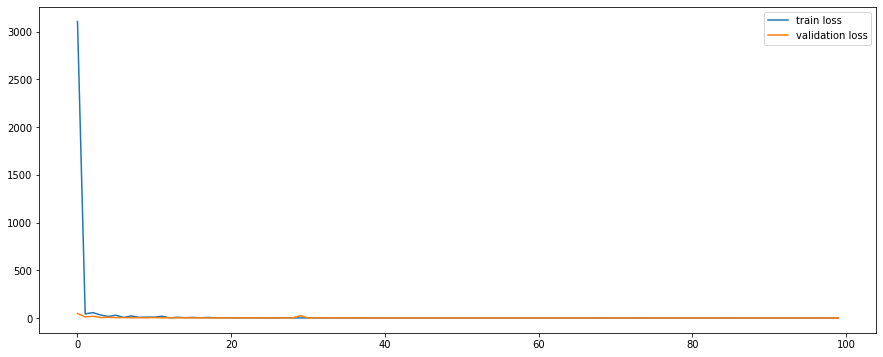

In [132]:
plt.figure(figsize=(15,6))
plt.plot(x[:], label='train loss')
plt.plot(xx[:], label='validation loss')
plt.legend()

# test the model

In [2]:
model_test = test_regression_0(model_type = model_type, feature_name = data_type, future_time = future_time,data_train_loader = train_loader,data_val_loader = val_loader,data_test_loader = test_loader)
test_result = model_test.test_train()

In [3]:
model_test = test_regression_0(model_type = model_type, feature_name = data_type, future_time = future_time,data_train_loader = train_loader,data_val_loader = val_loader,data_test_loader = test_loader)
test_result = model_test.test_val()

In [4]:
model_test = test_regression_0(model_type = model_type, feature_name = data_type, future_time = future_time,data_train_loader = train_loader,data_val_loader = val_loader,data_test_loader = test_loader)
test_result = model_test.test_test()